In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('analysis.csv')

In [3]:
df

,DateTime,EAE_DAY,DC_Current,IGBT_TEMP,INV_ALARM,INV_FAULT_CODE,Active_Power,DC_Power,Voltage,AMBIENT_TEMP,MODULE_TEMP,POA,POA_CUM,EAE_DAY_Plant,Active_Power_Plant,Anomaly,Anomaly_Score,Inv_f_c,cluster
0,2021-04-01 06:45:00,0.02,61.669998,52.00,0,0,36.369999,36.000000,351.890015,29.15,51.73,23.709999,0.00,0.19000,1.69,0,-0.03,0,10
1,2021-04-01 06:50:00,0.02,80.000000,54.00,0,0,48.369999,47.669998,355.109985,29.18,51.92,44.630001,0.01,0.42000,2.34,0,-0.03,0,10
2,2021-04-01 06:55:00,0.02,98.750000,56.25,0,0,59.700001,59.250000,353.829987,29.29,52.13,49.320000,0.01,0.61000,2.99,0,-0.04,0,10
3,2021-04-01 07:00:00,0.02,114.669998,58.00,0,0,70.330002,68.669998,351.670013,29.37,52.29,50.000000,0.01,0.99000,3.53,0,-0.03,0,10
4,2021-04-01 07:05:00,0.04,123.330002,60.00,0,0,75.099998,75.330002,352.500000,29.48,52.52,60.330002,0.02,1.18000,3.82,0,-0.04,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76590,2022-03-31 22:45:00,5.62,0.000000,56.00,0,0,0.000000,0.000000,383.670013,28.33,53.32,0.000000,0.42,275.01001,-0.14,0,-0.12,0,1
76591,2022-03-31 22:50:00,5.62,0.000000,56.00,0,0,0.000000,0.000000,382.920013,28.67,53.05,0.000000,0.42,275.01001,-0.14,0,-0.12,0,1
76592,2022-03-31 22:55:00,5.62,0.000000,56.00,0,0,0.000000,0.000000,382.000000,28.58,53.08,0.000000,0.42,275.01001,-0.14,0,-0.12,0,1
76593,2022-03-31 23:00:00,5.62,0.000000,56.00,0,0,0.000000,0.000000,383.000000,28.32,53.05,0.000000,0.42,275.01001,-0.14,0,-0.12,0,1


In [4]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract features from 'DateTime'
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute

# Drop the original 'DateTime' column
df = df.drop(columns=['DateTime'])

In [57]:
X = df[['Year','Month','Day','Hour','Minute', 'EAE_DAY', 'DC_Current', 'IGBT_TEMP', 'INV_ALARM', 'INV_FAULT_CODE', 'Active_Power', 'DC_Power', 'Voltage', 'AMBIENT_TEMP', 'MODULE_TEMP', 'POA', 'POA_CUM', 'EAE_DAY_Plant', 'Active_Power_Plant']]
y = df['Anomaly']

In [58]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have your features stored in X and the target variable stored in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_jobs=-1)

# Create the RFE object and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = model.predict(X_test_selected)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 0.9907306671308586
Precision: 0.9363295880149812
Recall: 0.8733624454148472


In [59]:
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['EAE_DAY', 'DC_Current', 'IGBT_TEMP', 'Active_Power', 'DC_Power',
       'Voltage', 'AMBIENT_TEMP', 'POA', 'POA_CUM'],
      dtype='object')


In [56]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels stored in y_true and the predicted labels stored in y_pred

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[21766    68]
 [  153   992]]


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your time series data stored in X and binary labels in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)




RandomForestClassifier()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9917315810087471


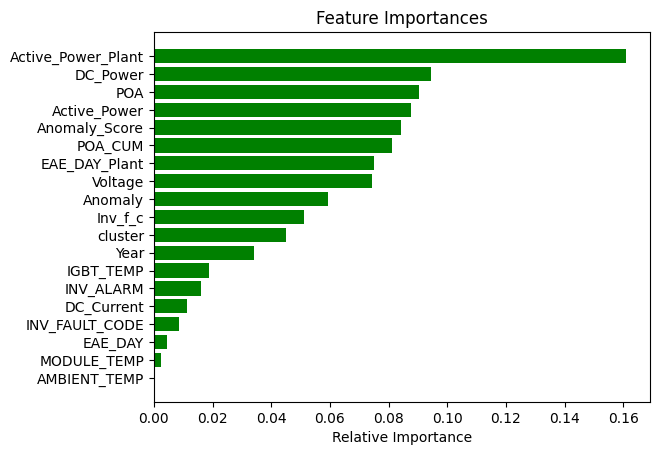

In [8]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [9]:
import shap


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [108]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


In [ ]:
class_names = ['1', '0']


In [ ]:
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns)


## adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier

# Create an AdaBoost classifier with the base model
model = AdaBoostClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9813307802776448


## cluster count

In [10]:
cluster_counts_1 = df[df['Anomaly'] == 1]['cluster'].value_counts()
cluster_counts_0 = df[df['Anomaly'] == 0]['cluster'].value_counts()

print("Counts for cluster column where anomaly is 1:")
print(cluster_counts_1)

print("\nCounts for cluster column where anomaly is 0:")
print(cluster_counts_0)


Counts for cluster column where anomaly is 1:
cluster
4    1751
9    1059
3     614
7     353
5      43
6      10
Name: count, dtype: int64

Counts for cluster column where anomaly is 0:
cluster
7     15238
2     13907
10    12082
8     12016
1     10026
3      6018
4      2737
6       609
5       128
9         4
Name: count, dtype: int64


In [11]:
df

,EAE_DAY,DC_Current,IGBT_TEMP,INV_ALARM,INV_FAULT_CODE,Active_Power,DC_Power,Voltage,AMBIENT_TEMP,MODULE_TEMP,...,Active_Power_Plant,Anomaly,Anomaly_Score,Inv_f_c,cluster,Year,Month,Day,Hour,Minute
0,0.02,61.669998,52.00,0,0,36.369999,36.000000,351.890015,29.15,51.73,...,1.69,0,-0.03,0,10,2021,4,1,6,45
1,0.02,80.000000,54.00,0,0,48.369999,47.669998,355.109985,29.18,51.92,...,2.34,0,-0.03,0,10,2021,4,1,6,50
2,0.02,98.750000,56.25,0,0,59.700001,59.250000,353.829987,29.29,52.13,...,2.99,0,-0.04,0,10,2021,4,1,6,55
3,0.02,114.669998,58.00,0,0,70.330002,68.669998,351.670013,29.37,52.29,...,3.53,0,-0.03,0,10,2021,4,1,7,0
4,0.04,123.330002,60.00,0,0,75.099998,75.330002,352.500000,29.48,52.52,...,3.82,0,-0.04,0,10,2021,4,1,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76590,5.62,0.000000,56.00,0,0,0.000000,0.000000,383.670013,28.33,53.32,...,-0.14,0,-0.12,0,1,2022,3,31,22,45
76591,5.62,0.000000,56.00,0,0,0.000000,0.000000,382.920013,28.67,53.05,...,-0.14,0,-0.12,0,1,2022,3,31,22,50
76592,5.62,0.000000,56.00,0,0,0.000000,0.000000,382.000000,28.58,53.08,...,-0.14,0,-0.12,0,1,2022,3,31,22,55
76593,5.62,0.000000,56.00,0,0,0.000000,0.000000,383.000000,28.32,53.05,...,-0.14,0,-0.12,0,1,2022,3,31,23,0


In [12]:
new_dataset = df[df['Anomaly'] == 1]


In [13]:
new_dataset = new_dataset[new_dataset['cluster'] != 6]
new_dataset = new_dataset[new_dataset['cluster'] != 5]

In [14]:
X = new_dataset[['Month', 'EAE_DAY', 'DC_Current', 'IGBT_TEMP', 'Active_Power', 'DC_Power', 'Voltage',  'MODULE_TEMP', 'POA', 'POA_CUM', 'EAE_DAY_Plant', 'Active_Power_Plant']]

In [15]:
y= new_dataset['cluster']

## cluster classification

In [16]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your features stored in X and the target variable stored in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier()

# Create the RFE object and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = model.predict(X_test_selected)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9938271604938271


In [17]:
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Month', 'EAE_DAY', 'MODULE_TEMP', 'POA', 'POA_CUM'], dtype='object')


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have your features stored in X and the cluster column stored in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Precision: 0.9902991895434704
Recall: 0.9902955447728276
F1 Score: 0.9902883616354118


In [18]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels stored in y_true and the predicted labels stored in y_pred

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[184   0   0   0]
 [  0 523   0   2]
 [  0   0 105   0]
 [  0   5   0 315]]


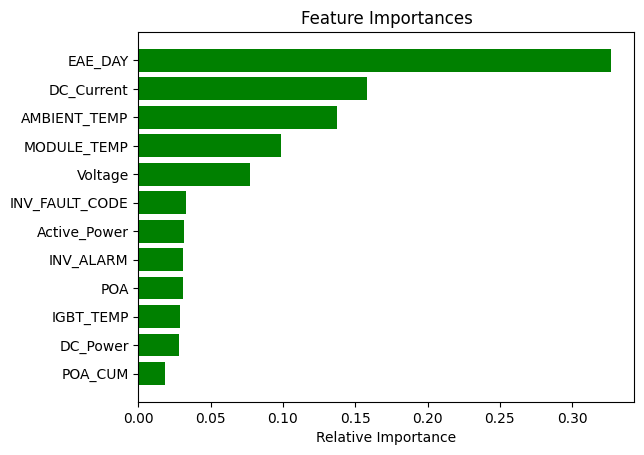

In [99]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [100]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [101]:
class_names=['4', '9', '3', '7']

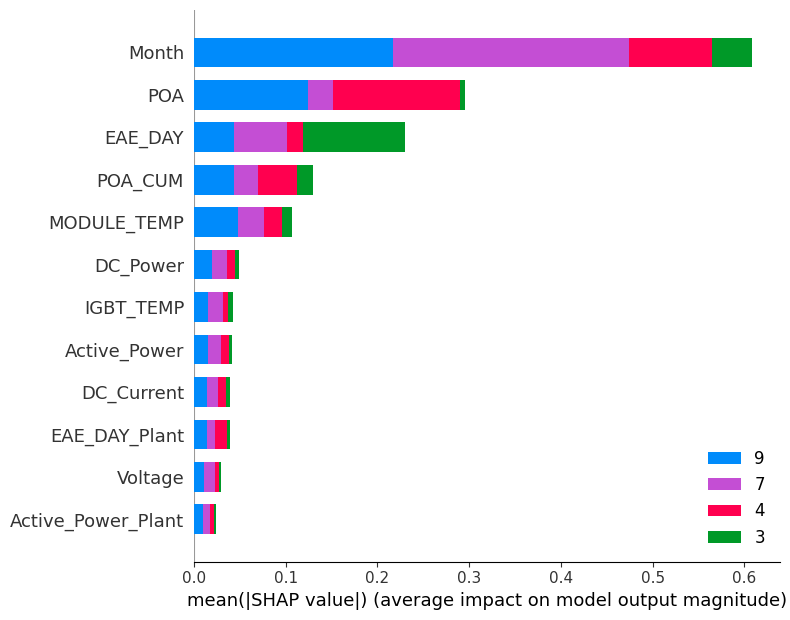

In [102]:
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


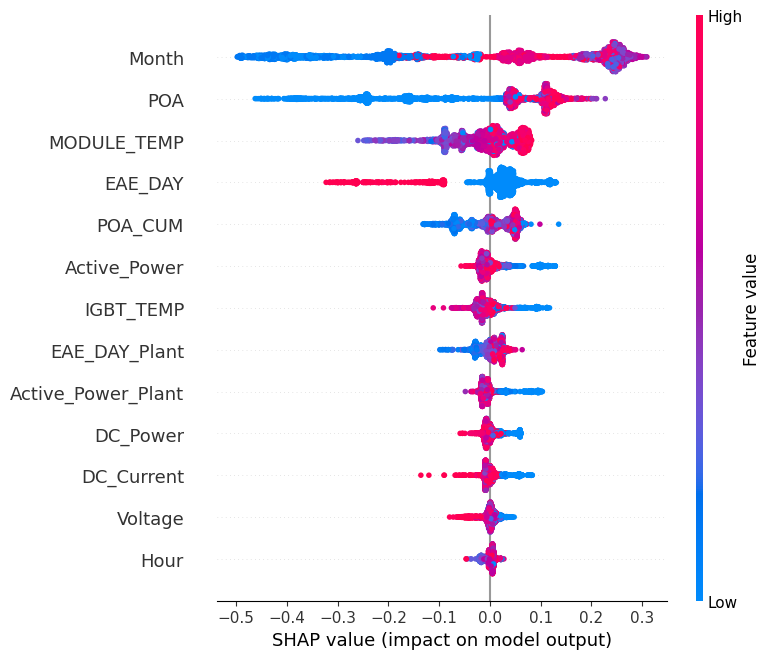

In [90]:
shap.summary_plot(shap_values[1], X.values, feature_names = X.columns)

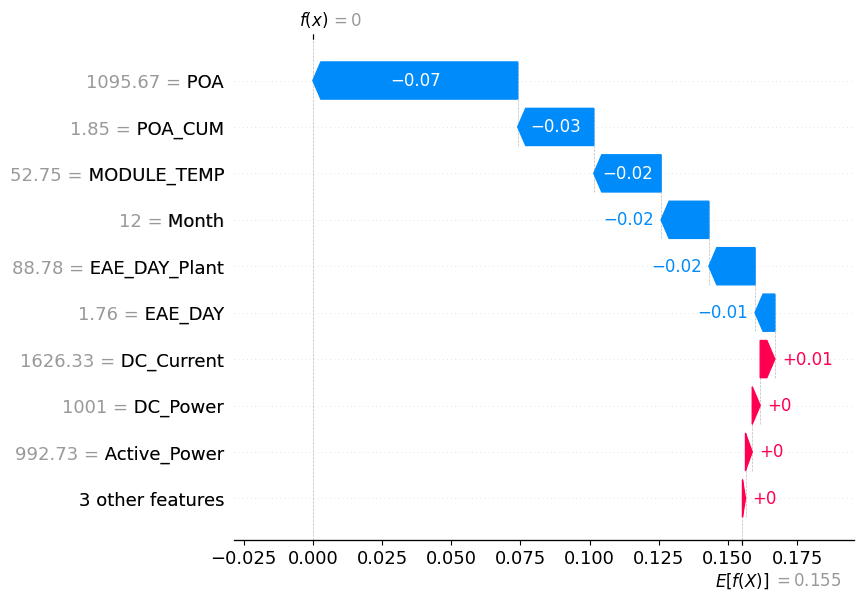

In [104]:
row = 100
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))